# <center> Zestaw 3
## <center> Ryszard Pręcikowski
### <center> 401433

# Zadanie 1

In [202]:
import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt
from scipy.integrate import quad
np.set_printoptions(precision=3, suppress=True)


In [203]:
def plot_approx(original, approx, points = None):
    lf = lambdify(x, original)
    # la = lambdify(x, approx)
    x_v = np.linspace(-1,1, 1000)
    plt.plot(x_v, lf(x_v), label = "original")
    plt.plot(x_v, approx(x_v), label = "approximated")
    if points is not None:
        plt.scatter(points[0], points[1], s = 12, label = "nodes")
    plt.legend()
    plt.show()


In [204]:
def discrete_approx(f, n = 21, k = 10, a = -1, b = 1):
    points_x = np.linspace(a, b, num= n)

    points_y = f(points_x)

    def S(k):
        return np.sum(points_x ** k)

    def T(k):
        return np.sum(points_x ** k * points_y)
    #TODO
    

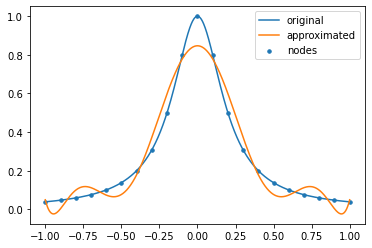

In [205]:
def discrete_approx_normal(f, n = 21, k = 10, a = -1, b = 1):
    points_x = np.linspace(a, b, num= n)
    lf = lambdify (x, f)
    points_y = lf(points_x)
    matrix = np.zeros([n, k])

    matrix[:,0] = 1

    for i in range(1, k):
        matrix[:,i] = points_x ** i

    a = np.linalg.solve(matrix.T @ matrix, matrix.T @ points_y)

    coefs = a[::-1]
    poly = np.poly1d(coefs)

    plot_approx(f, poly, [points_x, points_y])


# x = Symbol('x')

f = 1/ (1 + 25 * x ** 2)

f


discrete_approx_normal(f, n = 21)

In [206]:
def continuous_approx_Hilbert_matrix(f, k = 10, a = -1, b = 1):
    matrix = np.zeros((k, k))

    for i in range (k):
        for j in range(i, k):
            matrix[i][j] = matrix[j][i] = 1 / (i + j + 1)

    print(matrix)

    lf = lambdify (x, f)



continuous_approx_Hilbert_matrix(f, 4) #TODO

[[1.    0.5   0.333 0.25 ]
 [0.5   0.333 0.25  0.2  ]
 [0.333 0.25  0.2   0.167]
 [0.25  0.2   0.167 0.143]]


Poly(13.3919129887393*x**8 - 29.9951014807902*x**6 + 23.1048279754856*x**4 - 7.19903332492329*x**2 + 0.850416498439912, x, domain='RR')


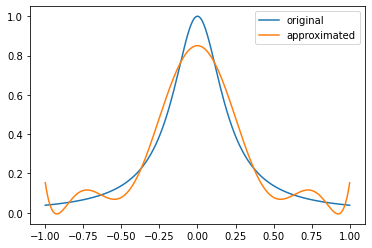

Poly(13.3919129887393*x**8 - 29.9951014807902*x**6 + 23.1048279754856*x**4 - 7.19903332492329*x**2 + 0.850416498439912, x, domain='RR')

In [252]:



def continuous_approx_Legendre_polynomials(f, k = 10):
    def LegendrePoly(n):
        if n == 0:
            return poly(1, x)
        if n == 1:
            return poly(x)
        return 1/(n) * ((2*n - 1) * x * LegendrePoly(n-1) - (n - 1) * LegendrePoly(n-2))

    def d(i):
        b = (f * LegendrePoly(i).as_expr())
        bl = lambdify(x, b)
        #nie trzeba obliczac jednej calki :)
        # (2*i + 1) = integrate((LegendrePoly(i) ** 2).as_expr(), (x, -1, 1))
        return (2*i + 1) / 2 * quad(bl, -1, 1)[0]

    res = 0

    for i in range(k):
        res += d(i) * LegendrePoly(i)

    print(res)

    lambdified = lambdify(x, res.as_expr())

    plot_approx(f, lambdified)
    return res

continuous_approx_Legendre_polynomials(f)

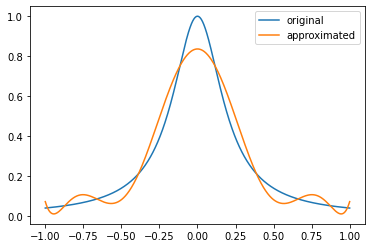

Poly(10.2431408135389*x**8 - 24.2965291445721*x**6 + 19.9366346517616*x**4 - 6.64860849436874*x**2 + 0.83598892938871, x, domain='RR')

In [251]:
def continuous_approx_Chebyshev_polynomials(f, k = 10):
    def ChebyshevPoly(n):
        # return cos(n * acos(x))
        if n == 0:
            return poly(1, x)
        if n == 1:
            return poly(x)
        return 2 * x * ChebyshevPoly(n-1) - ChebyshevPoly(n-2)

    w = 1 / sqrt(1 - x ** 2)

    def C(k):
        # if k == 0:
        #     return pi
        # return pi / 2
        # zamiast calkowac mozna tak :)

        # return integrate(w * (ChebyshevPoly(k).as_expr()  ** 2), (x, -1, 1))
        #tak samo co w a, bardzo wolne ¯\_(ツ)_/¯

        to_integrate = w * (ChebyshevPoly(k).as_expr()  ** 2)
        lambdified = lambdify(x, to_integrate)

        return quad(lambdified, -1, 1)[0]

    def a(k):
        #integrate z sympy dziala bardzo wolno ¯\_(ツ)_/¯
        to_integrate = w * ChebyshevPoly(k).as_expr() * f
        lambdified = lambdify(x, to_integrate)

        return 1/C(k) * quad(lambdified, -1, 1)[0]

    res = 0
    for i in range(k):
        # print(C(i))
        # print(a(i))
        res += a(i) * ChebyshevPoly(i)



    lambdified = lambdify(x, res.as_expr())

    plot_approx(f, lambdified)

    return res

continuous_approx_Chebyshev_polynomials(f)